# Mall Customers Segmentation

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 21-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

## Introduction:
Customer segmentation helps businesses identify distinct groups of customers based on their behavior and characteristics. In this project, we aim to segment mall customers based on their annual income and spending score using the K-Means clustering algorithm. By grouping similar customers together, businesses can tailor marketing strategies and improve customer satisfaction.

The dataset contains demographic information about customers, including their gender, age, annual income, and spending score. Our goal is to identify meaningful clusters that can provide insights into different customer segments.

---

## 1. Importing the Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and reviewing the Dataset

In [109]:
# loading the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Information and Statistical Overview

In [110]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Observation:
* The dataset has 200 entries and 5 columns.
* The CustomerID is a unique identifier, and it is unnecessary for clustering.
* Gender is categorical and needs encoding.
* The dataset contains both continuous and categorical data.

## 4. Dropping the CustomerID Column

In [111]:
# Since CustomerID is not relevant for clustering, we'll drop it.
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 5. Data Distribution

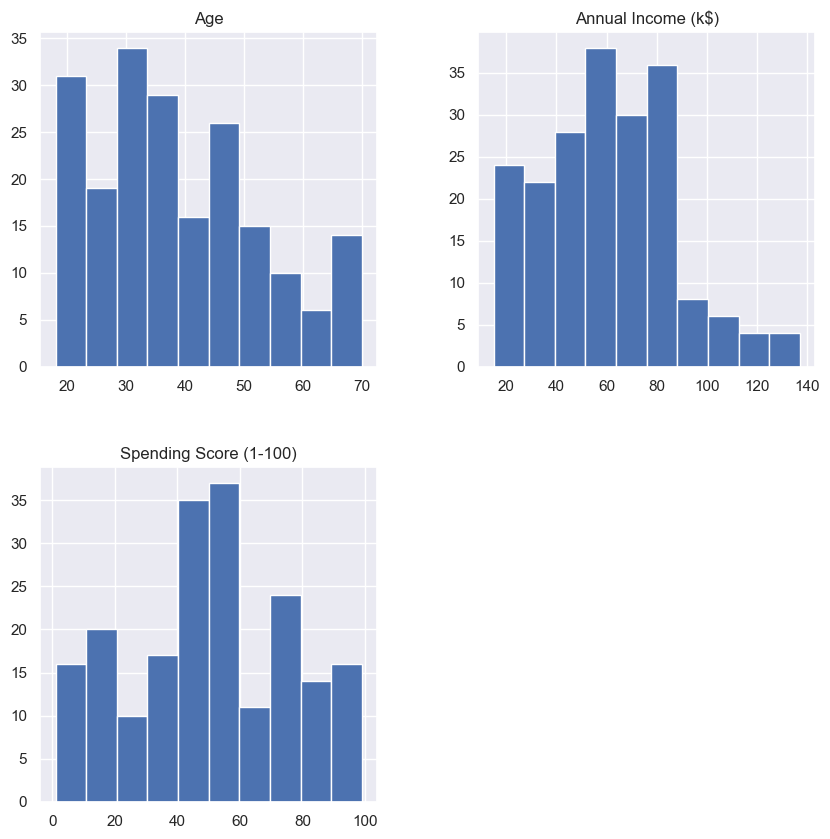

In [112]:
# plotting the distribution of the data
df.hist(figsize=(10,10))
plt.show()

### Observation:
* The distributions of age, annual income, and spending score show clear variations.
* Annual income and spending score are fairly evenly distributed, while age has a higher concentration around younger individuals.

## 6. Encoding the Gender Column
Since Gender is categorical, we'll use label encoding to convert it into a numerical format.

In [113]:
# one hot encoding the gender column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## 7. Correlation Analysis
Let's analyze the correlations between features to understand relationships in the data

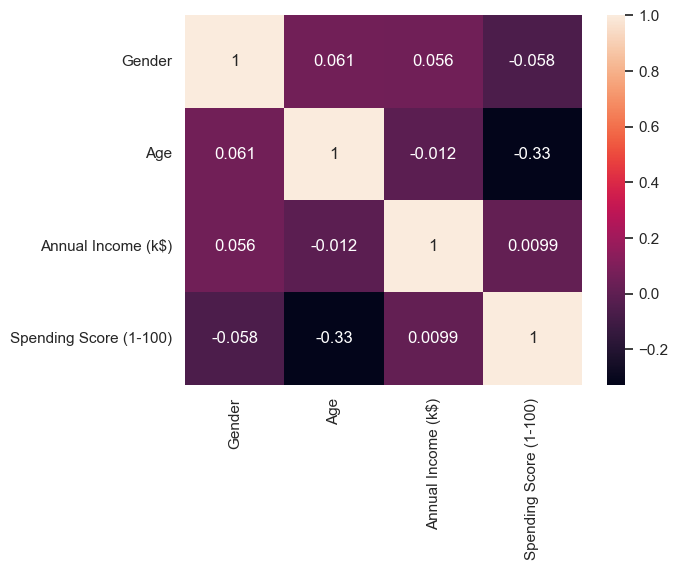

In [114]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### observations:
* Gender has little correlation with annual income or spending score.
* Annual income and spending score do not have a strong correlation, suggesting clustering may reveal different patterns.

## 8. Selecting Features for Clustering
We'll use the Annual Income and Spending Score columns for clustering. These two variables are the most relevant for segmenting customers based on their purchasing power and behavior.

In [115]:
X = df.iloc[:, [2, 3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## 9. Elbow Method for Optimal Number of Clusters
To determine the optimal number of clusters, we'll use the elbow method by plotting the Within-Cluster Sum of Squares (WCSS).

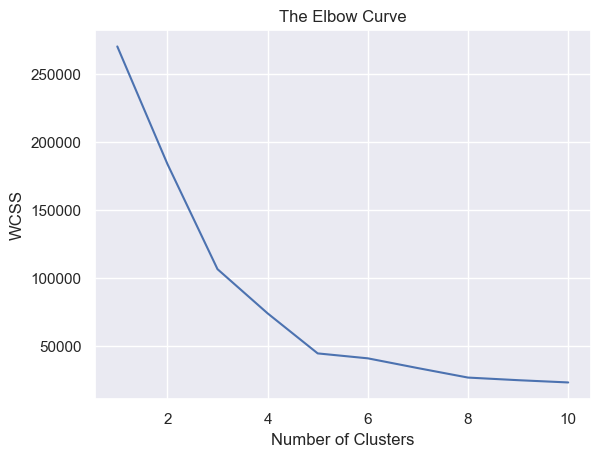

In [116]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Observations:
* The elbow curve suggests that 5 clusters is the optimal number, as the WCSS starts to flatten after 5 clusters.

## 10. Training the K-Means Model
Based on the elbow method, we'll train the K-Means model with 5 clusters.

In [117]:
# training the model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

## 11. Visualizing the Clusters
Let's visualize the clusters by plotting Annual Income vs. Spending Score. We’ll also plot the cluster centroids.

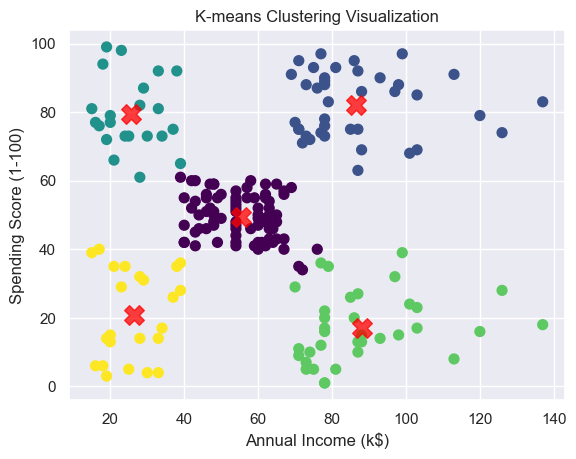

In [118]:
# plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.75, marker = 'X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Visualization')
plt.show()

### Cluster Interpretation:
* Cluster 1 (bottom left): Customers with low annual income and low spending scores.
* Cluster 2 (top left): Customers with low annual income but high spending scores (possibly budget-conscious yet frequent shoppers).
* Cluster 3 (bottom right): Customers with high annual income but low spending scores (likely high earners who are less engaged).
* Cluster 4 (top right): Customers with high annual income and high spending scores (likely the most valued customers).
* Cluster 5 (center): Moderate income and moderate spending score customers.

## Summary:
In this project, we successfully segmented mall customers based on their annual income and spending score using K-Means clustering. Here’s what we did:

1. Data Preprocessing: We loaded the dataset, explored its structure, and encoded the gender column for analysis.
2. Data Visualization: We analyzed the distribution of data and visualized correlations between features.
3. Feature Selection: We selected Annual Income and Spending Score as key features for clustering.
4. Optimal Clusters: Using the elbow method, we determined 5 clusters to be optimal.
5. Cluster Visualization: We plotted the clusters and provided insights into the customer segments.

These segments can help mall management target their marketing strategies more effectively, identifying valuable customer groups like high spenders and budget-conscious customers.